In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


/root/miniconda3/envs/myconda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
feeds = pd.read_csv('train/train_data_feeds.csv')

# Advertisers 

### Advertisers (providing `ads.csv`): They concentrate on user interactions with advertisements.
- log_id
- label
- user_id
- age
- gender
- residence
- city
- city_rank
- series_dev
- series_group
- emui_dev
- device_name
- device_size
- net_type
- task_id
- adv_id
- creat_type_cd
- adv_prim_id
- inter_type_cd
- slot_id
- site_id
- spread_app_id
- hispace_app_tags
- app_second_class
- app_score
- ad_click_list_v001
- ad_click_list_v002
- ad_click_list_v003
- ad_close_list_v001
- ad_close_list_v002
- ad_close_list_v003
- pt_d
- u_newsCatInterestsST
- u_refreshTimes
- u_feedLifeCycle

In [3]:
ads = ads.head(100)

In [4]:
for column in ads.columns:
    print(f"- {column}")

- log_id
- label
- user_id
- age
- gender
- residence
- city
- city_rank
- series_dev
- series_group
- emui_dev
- device_name
- device_size
- net_type
- task_id
- adv_id
- creat_type_cd
- adv_prim_id
- inter_type_cd
- slot_id
- site_id
- spread_app_id
- hispace_app_tags
- app_second_class
- app_score
- ad_click_list_v001
- ad_click_list_v002
- ad_click_list_v003
- ad_close_list_v001
- ad_close_list_v002
- ad_close_list_v003
- pt_d
- u_newsCatInterestsST
- u_refreshTimes
- u_feedLifeCycle


# Publishers 

#### Publishers (providing `feeds.csv`): They focus on user interactions with news content.

- u_userId
- u_phonePrice
- u_browserLifeCycle
- u_browserMode
- u_feedLifeCycle
- u_refreshTimes
- u_newsCatInterests
- u_newsCatDislike
- u_newsCatInterestsST
- u_click_ca2_news
- i_docId
- i_s_sourceId
- i_regionEntity
- i_cat
- i_entities
- i_dislikeTimes
- i_upTimes
- i_dtype
- e_ch
- e_m
- e_po
- e_pl
- e_rn
- e_section
- e_et
- label
- cillabel
- pro

In [6]:
for column in feeds.columns:
    print(f"- {column}")

- u_userId
- u_phonePrice
- u_browserLifeCycle
- u_browserMode
- u_feedLifeCycle
- u_refreshTimes
- u_newsCatInterests
- u_newsCatDislike
- u_newsCatInterestsST
- u_click_ca2_news
- i_docId
- i_s_sourceId
- i_regionEntity
- i_cat
- i_entities
- i_dislikeTimes
- i_upTimes
- i_dtype
- e_ch
- e_m
- e_po
- e_pl
- e_rn
- e_section
- e_et
- label
- cillabel
- pro


## Publisher Data Processing
* split list data
* for id data(in string format), we transformed it into int lists using a dictionary, then we used an autoencoder to conduct dimensionality reduction
* for timestamp data, we transformed it into int type which represents how mant minutes it is from the earliest time.

In [3]:
for column in feeds.columns:
    if feeds[column].dtype == object: #int or float
        print(f"Column: {column}, Data Type: {feeds[column].dtype}")

Column: u_newsCatInterests, Data Type: object
Column: u_newsCatDislike, Data Type: object
Column: u_newsCatInterestsST, Data Type: object
Column: u_click_ca2_news, Data Type: object
Column: i_docId, Data Type: object
Column: i_s_sourceId, Data Type: object
Column: i_entities, Data Type: object


In [4]:
object_columns_feeds = feeds.select_dtypes(include='object').columns
object_data_feeds = feeds[object_columns_feeds]
object_data_feeds.head(5)

,u_newsCatInterests,u_newsCatDislike,u_newsCatInterestsST,u_click_ca2_news,i_docId,i_s_sourceId,i_entities
0,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,6e3e6bcb58d1fdd57b01a423f7a777a51cbcc00e,1eba881ea576fc05dfe457dd2111cd1505caa5a8,c7c6575e357e3e82c87fd04b04b28ccb878653d1c68b3a...
1,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,f080276ae8aee56306253debbf643fb34b5af697,772b4a2593c3aa2590291f25d4bbc463a9ac49a2,40179dae61fecd7eaad86cdd128e70f119dd323750fc23...
2,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,f6ee51f33fe8623b713a16287a873c98b57e6861,645e57afbbafce5159ab7fe956837c40103f33c9,37d6e916f8c486d37683f03df3f578a6a65ac9fff01d03...
3,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,ee47079f7af99b70476161dbf5dcf0171cda5657,9e5226ef81bf205dfe0ceefd6b7124ead82a6416,e36aff85ea6234ef8c68865db8abfcdcb6abad46d5117e...
4,195^168^109^98^108,0,195^44^168^112^21,195^168^44^112^21,2363b609896dc2849cadf303a8d6494764754b93,3a705744387ea91d68ce6b8172b528c53df49185,86d9e350f494a419533ebda912fd123c37a10b3fe42547...


In [5]:
object_columns_feeds = feeds.select_dtypes(include='object').columns.drop(['i_docId', 'i_s_sourceId'])

# delete the '^' 
for col in object_columns_feeds:
    feeds[col] = feeds[col].apply(lambda x: x.split('^') if isinstance(x, str) else x)

# fixed length
fixed_length = 5

# pad or truncate 
def pad_or_truncate(lst, length):
    if len(lst) > length:
        return lst[:length]
    else:
        return lst + ['0'] * (length - len(lst))

for col in object_columns_feeds:
    feeds[col] = feeds[col].apply(lambda x: pad_or_truncate(x, fixed_length) if isinstance(x, list) else x)

In [6]:
feeds[object_columns_feeds].head()

,u_newsCatInterests,u_newsCatDislike,u_newsCatInterestsST,u_click_ca2_news,i_entities
0,"[195, 168, 109, 98, 108]","[0, 0, 0, 0, 0]","[195, 44, 168, 112, 21]","[195, 168, 44, 112, 21]",[c7c6575e357e3e82c87fd04b04b28ccb878653d1c68b3...
1,"[195, 168, 109, 98, 108]","[0, 0, 0, 0, 0]","[195, 44, 168, 112, 21]","[195, 168, 44, 112, 21]",[40179dae61fecd7eaad86cdd128e70f119dd323750fc2...
2,"[195, 168, 109, 98, 108]","[0, 0, 0, 0, 0]","[195, 44, 168, 112, 21]","[195, 168, 44, 112, 21]",[37d6e916f8c486d37683f03df3f578a6a65ac9fff01d0...
3,"[195, 168, 109, 98, 108]","[0, 0, 0, 0, 0]","[195, 44, 168, 112, 21]","[195, 168, 44, 112, 21]",[e36aff85ea6234ef8c68865db8abfcdcb6abad46d5117...
4,"[195, 168, 109, 98, 108]","[0, 0, 0, 0, 0]","[195, 44, 168, 112, 21]","[195, 168, 44, 112, 21]",[86d9e350f494a419533ebda912fd123c37a10b3fe4254...


In [7]:
# split into multiple columns
def split_list_column(df, column_name, new_column_prefix):
    max_length = df[column_name].apply(len).max()
    
    split_columns = pd.DataFrame(df[column_name].tolist(),
                                 columns=[f'{new_column_prefix}_{i+1}' for i in range(max_length)])
    df = df.drop(columns=[column_name]).join(split_columns)
    return df

feeds = split_list_column(feeds, 'u_newsCatInterests', 'u_newsCatInterests')
feeds = split_list_column(feeds, 'u_newsCatDislike', 'u_newsCatDislike')
feeds = split_list_column(feeds, 'u_newsCatInterestsST', 'u_newsCatInterestsST')
feeds = split_list_column(feeds, 'u_click_ca2_news', 'u_click_ca2_news')

In [8]:
i_entities_list = feeds['i_entities'].tolist()
feeds['i_entities_1'] = [row[0] if isinstance(row, list) else row for row in i_entities_list]
feeds['i_entities_2'] = [row[1] if isinstance(row, list) else row for row in i_entities_list]
feeds['i_entities_3'] = [row[2] if isinstance(row, list) else row for row in i_entities_list]
feeds['i_entities_4'] = [row[3] if isinstance(row, list) else row for row in i_entities_list]
feeds['i_entities_5'] = [row[4] if isinstance(row, list) else row for row in i_entities_list]

In [9]:
_64_0 = '0'*64
# _64_0

In [10]:
# replace nan with '0'*64
feeds['i_entities_5'] = feeds['i_entities_5'].fillna('0').replace({'0':_64_0})
feeds['i_entities_4'] = feeds['i_entities_4'].fillna('0').replace({'0':_64_0})
feeds['i_entities_3'] = feeds['i_entities_3'].fillna('0').replace({'0':_64_0})
feeds['i_entities_2'] = feeds['i_entities_2'].fillna('0').replace({'0':_64_0})
feeds['i_entities_1'] = feeds['i_entities_1'].fillna('0').replace({'0':_64_0})

In [11]:
for column in feeds.columns:
    if column not in ['i_docId', 'i_s_sourceId', 'i_entities'] and feeds[column].dtype == object: #int or float
        print(f"Column: {column}, Data Type: {feeds[column].dtype}")

Column: u_newsCatInterests_1, Data Type: object
Column: u_newsCatInterests_2, Data Type: object
Column: u_newsCatInterests_3, Data Type: object
Column: u_newsCatInterests_4, Data Type: object
Column: u_newsCatInterests_5, Data Type: object
Column: u_newsCatDislike_1, Data Type: object
Column: u_newsCatDislike_2, Data Type: object
Column: u_newsCatDislike_3, Data Type: object
Column: u_newsCatDislike_4, Data Type: object
Column: u_newsCatDislike_5, Data Type: object
Column: u_newsCatInterestsST_1, Data Type: object
Column: u_newsCatInterestsST_2, Data Type: object
Column: u_newsCatInterestsST_3, Data Type: object
Column: u_newsCatInterestsST_4, Data Type: object
Column: u_newsCatInterestsST_5, Data Type: object
Column: u_click_ca2_news_1, Data Type: object
Column: u_click_ca2_news_2, Data Type: object
Column: u_click_ca2_news_3, Data Type: object
Column: u_click_ca2_news_4, Data Type: object
Column: u_click_ca2_news_5, Data Type: object
Column: i_entities_1, Data Type: object
Column: i_

In [12]:
new_object_columns = feeds.select_dtypes(include='object').columns
feeds[new_object_columns].head()

,i_docId,i_s_sourceId,i_entities,u_newsCatInterests_1,u_newsCatInterests_2,u_newsCatInterests_3,u_newsCatInterests_4,u_newsCatInterests_5,u_newsCatDislike_1,u_newsCatDislike_2,...,u_click_ca2_news_1,u_click_ca2_news_2,u_click_ca2_news_3,u_click_ca2_news_4,u_click_ca2_news_5,i_entities_1,i_entities_2,i_entities_3,i_entities_4,i_entities_5
0,6e3e6bcb58d1fdd57b01a423f7a777a51cbcc00e,1eba881ea576fc05dfe457dd2111cd1505caa5a8,[c7c6575e357e3e82c87fd04b04b28ccb878653d1c68b3...,195,168,109,98,108,0,0,...,195,168,44,112,21,c7c6575e357e3e82c87fd04b04b28ccb878653d1c68b3a...,2efad488394283a0fdbc0c3b327620c71bc3f608087bc6...,2aea24a7e1965c2a8b13ad12ef3ac43038a4d134cac865...,42902572c594698b4e74da26a248a81ecae367a6dd5e18...,d879f5a04f1ca25fb4f9a4950405cc7980dee5493801cf...
1,f080276ae8aee56306253debbf643fb34b5af697,772b4a2593c3aa2590291f25d4bbc463a9ac49a2,[40179dae61fecd7eaad86cdd128e70f119dd323750fc2...,195,168,109,98,108,0,0,...,195,168,44,112,21,40179dae61fecd7eaad86cdd128e70f119dd323750fc23...,300ee80c8ec43b8a9f7729ea5073ae17a3747607e7f417...,dc6750a54c6c6e3b682d634dc3317cdb54014da4939096...,aa423a8443e4542322d0cfd8d617e1038a16e68583869b...,6e420a55fe36a751a11e2065120d42b3c4f896fcb9d1c9...
2,f6ee51f33fe8623b713a16287a873c98b57e6861,645e57afbbafce5159ab7fe956837c40103f33c9,[37d6e916f8c486d37683f03df3f578a6a65ac9fff01d0...,195,168,109,98,108,0,0,...,195,168,44,112,21,37d6e916f8c486d37683f03df3f578a6a65ac9fff01d03...,bed7412774fb469514f6b5e9cb4ecffbe9a146aaa25384...,c4f96823c8c1fa3f2c33848a29b21cf119177b4c6dba18...,ea157038f50e151d9112027637e6a5a09460e1607fcb1d...,06f5762724228921c4eeb9f90f1a8728ba7925c2798eb8...
3,ee47079f7af99b70476161dbf5dcf0171cda5657,9e5226ef81bf205dfe0ceefd6b7124ead82a6416,[e36aff85ea6234ef8c68865db8abfcdcb6abad46d5117...,195,168,109,98,108,0,0,...,195,168,44,112,21,e36aff85ea6234ef8c68865db8abfcdcb6abad46d5117e...,cf6be93734697f9dcb992c5a3766c3bcba16ad27da0150...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...
4,2363b609896dc2849cadf303a8d6494764754b93,3a705744387ea91d68ce6b8172b528c53df49185,[86d9e350f494a419533ebda912fd123c37a10b3fe4254...,195,168,109,98,108,0,0,...,195,168,44,112,21,86d9e350f494a419533ebda912fd123c37a10b3fe42547...,12c3d6f6b1f31103ab25a03cfb19bcadee4b41d3edb65f...,df2066ad1dade732fb4657ddaf0d7603e311ae24b938e1...,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...


In [2]:
char_to_int = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18,
    'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'q': 26, 'r': 27,
    's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33, 'y': 34, 'z': 35
}

def string_to_vector(string):
    return [char_to_int[char] for char in string]

int_to_char = {}

for item in char_to_int:
    int_to_char[char_to_int.get(item)] = item
    
def vector_to_string(vector):
    return [int_to_char[int] for int in vector]

In [14]:
# transform string into int lists and generate tensor
i_docId_tensor = torch.tensor(feeds['i_docId'].apply(string_to_vector), dtype=torch.float32)
i_s_sourceId_tensor = torch.tensor(feeds['i_s_sourceId'].apply(string_to_vector), dtype=torch.float32)
i_entities_1_tensor = torch.tensor(feeds['i_entities_1'].apply(string_to_vector), dtype=torch.float32)
i_entities_2_tensor = torch.tensor(feeds['i_entities_2'].apply(string_to_vector), dtype=torch.float32)
i_entities_3_tensor = torch.tensor(feeds['i_entities_3'].apply(string_to_vector), dtype=torch.float32)
i_entities_4_tensor = torch.tensor(feeds['i_entities_4'].apply(string_to_vector), dtype=torch.float32)
i_entities_5_tensor = torch.tensor(feeds['i_entities_5'].apply(string_to_vector), dtype=torch.float32)

In [3]:
# train autoencoders to conduct demensionality reduction
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 编码器部分
        self.encoder = nn.Sequential(
            nn.Linear(40, 30),
            nn.ReLU(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
        )
        # 解码器部分
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 30),
            nn.ReLU(),
            nn.Linear(30, 40),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 创建模型实例
model = Autoencoder()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 打印模型结构
print(model)

batch_size = 128

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=40, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=5, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=30, bias=True)
    (5): ReLU()
    (6): Linear(in_features=30, out_features=40, bias=True)
  )
)


In [16]:
# 示例训练过程
num_epochs = 10000
for epoch in range(num_epochs):
    
    train_tensor = i_docId_tensor[torch.randint(0, len(i_docId_tensor), (batch_size,))]
    outputs = model(train_tensor)
    loss = criterion(outputs, train_tensor)
    
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印每个 epoch 的损失
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/10000], Loss: 20.8863
Epoch [200/10000], Loss: 21.1022
Epoch [300/10000], Loss: 21.1741
Epoch [400/10000], Loss: 20.8991
Epoch [500/10000], Loss: 20.6620
Epoch [600/10000], Loss: 20.9542
Epoch [700/10000], Loss: 20.3563
Epoch [800/10000], Loss: 20.2988
Epoch [900/10000], Loss: 20.2045
Epoch [1000/10000], Loss: 20.1577
Epoch [1100/10000], Loss: 20.3540
Epoch [1200/10000], Loss: 19.9939
Epoch [1300/10000], Loss: 20.1617
Epoch [1400/10000], Loss: 19.6392
Epoch [1500/10000], Loss: 20.2462
Epoch [1600/10000], Loss: 19.6639
Epoch [1700/10000], Loss: 19.6584
Epoch [1800/10000], Loss: 19.9773
Epoch [1900/10000], Loss: 19.4739
Epoch [2000/10000], Loss: 19.2531
Epoch [2100/10000], Loss: 19.2662
Epoch [2200/10000], Loss: 19.0551
Epoch [2300/10000], Loss: 19.2860
Epoch [2400/10000], Loss: 18.7383
Epoch [2500/10000], Loss: 18.3097
Epoch [2600/10000], Loss: 19.1214
Epoch [2700/10000], Loss: 19.1353
Epoch [2800/10000], Loss: 19.1216
Epoch [2900/10000], Loss: 19.0953
Epoch [3000/10000], Los

In [4]:
# torch.save(model.state_dict(), 'i_docId_encode_model.pth')

i_docId_encode_model = Autoencoder()

i_docId_encode_model.load_state_dict(torch.load('i_docId_encode_model.pth'))

i_docId_encoded_data = i_docId_encode_model.encoder(i_docId_tensor).detach().numpy()
i_docId_decoded_data = i_docId_encode_model.decoder(torch.tensor(i_docId_encoded_data)).detach().numpy()
feeds = pd.concat([feeds, pd.DataFrame(i_docId_encoded_data, columns=[f'i_docId_encoded_{i+1}' for i in range(i_docId_encoded_data.shape[1])])], axis=1)


<All keys matched successfully>

In [19]:
model = Autoencoder()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 128

num_epochs = 10000
for epoch in range(num_epochs):
    
    train_tensor = i_s_sourceId_tensor[torch.randint(0, len(i_s_sourceId_tensor), (batch_size,))]
    outputs = model(train_tensor)
    loss = criterion(outputs, train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/10000], Loss: 20.7562
Epoch [200/10000], Loss: 20.4637
Epoch [300/10000], Loss: 20.4803
Epoch [400/10000], Loss: 20.2175
Epoch [500/10000], Loss: 20.3155
Epoch [600/10000], Loss: 20.4651
Epoch [700/10000], Loss: 20.4564
Epoch [800/10000], Loss: 19.6396
Epoch [900/10000], Loss: 19.3428
Epoch [1000/10000], Loss: 18.6002
Epoch [1100/10000], Loss: 18.7430
Epoch [1200/10000], Loss: 17.7368
Epoch [1300/10000], Loss: 18.2352
Epoch [1400/10000], Loss: 17.3151
Epoch [1500/10000], Loss: 17.1694
Epoch [1600/10000], Loss: 16.8237
Epoch [1700/10000], Loss: 17.0797
Epoch [1800/10000], Loss: 17.7349
Epoch [1900/10000], Loss: 16.6243
Epoch [2000/10000], Loss: 14.4122
Epoch [2100/10000], Loss: 15.4829
Epoch [2200/10000], Loss: 15.0379
Epoch [2300/10000], Loss: 14.2497
Epoch [2400/10000], Loss: 14.4617
Epoch [2500/10000], Loss: 15.4863
Epoch [2600/10000], Loss: 13.3371
Epoch [2700/10000], Loss: 14.6901
Epoch [2800/10000], Loss: 13.9181
Epoch [2900/10000], Loss: 13.7272
Epoch [3000/10000], Los

In [16]:
# torch.save(model.state_dict(), 'i_s_sourceId_encode_model.pth')

i_s_sourceId_encode_model = Autoencoder()

i_s_sourceId_encode_model.load_state_dict(torch.load('i_s_sourceId_encode_model.pth'))

i_s_sourceId_encoded_data = i_s_sourceId_encode_model.encoder(i_s_sourceId_tensor).detach().numpy()
i_s_sourceId_decoded_data = i_s_sourceId_encode_model.decoder(torch.tensor(i_s_sourceId_encoded_data)).detach().numpy()
feeds = pd.concat([feeds, pd.DataFrame(i_s_sourceId_encoded_data, columns=[f'i_s_sourceId_encoded_{i+1}' for i in range(i_s_sourceId_encoded_data.shape[1])])], axis=1)


<All keys matched successfully>

In [5]:
class Autoencoder_64(nn.Module):
    def __init__(self):
        super(Autoencoder_64, self).__init__()
        # 编码器部分
        self.encoder = nn.Sequential(
            nn.Linear(64, 30),
            nn.ReLU(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
        )
        # 解码器部分
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 30),
            nn.ReLU(),
            nn.Linear(30, 64),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder_64()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

batch_size = 128

num_epochs = 10000

i_entities_tensor = torch.cat([i_entities_1_tensor, i_entities_2_tensor, i_entities_3_tensor, i_entities_4_tensor, i_entities_5_tensor], dim=0)

for epoch in range(num_epochs):
    
    train_tensor = i_entities_tensor[torch.randint(0, len(i_entities_tensor), (batch_size,))]
    outputs = model(train_tensor)
    loss = criterion(outputs, train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [6]:
# torch.save(model.state_dict(), 'i_entities_encode_model.pth')

i_entities_encode_model = Autoencoder_64()

i_entities_encode_model.load_state_dict(torch.load('i_entities_encode_model.pth'))

i_entities_1_encoded_data = i_entities_encode_model.encoder(i_entities_1_tensor).detach().numpy()
i_entities_1_decoded_data = i_entities_encode_model.decoder(torch.tensor(i_entities_1_encoded_data)).detach().numpy()
feeds = pd.concat([feeds, pd.DataFrame(i_entities_1_encoded_data, columns=[f'i_entities_1_encoded_{i+1}' for i in range(i_entities_1_encoded_data.shape[1])])], axis=1)
i_entities_2_encoded_data = i_entities_encode_model.encoder(i_entities_2_tensor).detach().numpy()
i_entities_2_decoded_data = i_entities_encode_model.decoder(torch.tensor(i_entities_2_encoded_data)).detach().numpy()
feeds = pd.concat([feeds, pd.DataFrame(i_entities_2_encoded_data, columns=[f'i_entities_2_encoded_{i+1}' for i in range(i_entities_2_encoded_data.shape[1])])], axis=1)
i_entities_3_encoded_data = i_entities_encode_model.encoder(i_entities_3_tensor).detach().numpy()
i_entities_3_decoded_data = i_entities_encode_model.decoder(torch.tensor(i_entities_3_encoded_data)).detach().numpy()
feeds = pd.concat([feeds, pd.DataFrame(i_entities_3_encoded_data, columns=[f'i_entities_3_encoded_{i+1}' for i in range(i_entities_3_encoded_data.shape[1])])], axis=1)
i_entities_4_encoded_data = i_entities_encode_model.encoder(i_entities_4_tensor).detach().numpy()
i_entities_4_decoded_data = i_entities_encode_model.decoder(torch.tensor(i_entities_4_encoded_data)).detach().numpy()
feeds = pd.concat([feeds, pd.DataFrame(i_entities_4_encoded_data, columns=[f'i_entities_4_encoded_{i+1}' for i in range(i_entities_4_encoded_data.shape[1])])], axis=1)
i_entities_5_encoded_data = i_entities_encode_model.encoder(i_entities_5_tensor).detach().numpy()
i_entities_5_decoded_data = i_entities_encode_model.decoder(torch.tensor(i_entities_5_encoded_data)).detach().numpy()
feeds = pd.concat([feeds, pd.DataFrame(i_entities_5_encoded_data, columns=[f'i_entities_5_encoded_{i+1}' for i in range(i_entities_5_encoded_data.shape[1])])], axis=1)


<All keys matched successfully>

In [26]:
feeds['e_et'] = pd.to_datetime(feeds['e_et'], format='%Y%m%d%H%M')

In [27]:
feeds['minute_difference'] = -(feeds['e_et'].min() - feeds['e_et']).dt.total_seconds() / 60

In [24]:
feeds

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,i_docId,i_s_sourceId,i_regionEntity,i_cat,...,i_entities_4_encoded_2,i_entities_4_encoded_3,i_entities_4_encoded_4,i_entities_4_encoded_5,i_entities_5_encoded_1,i_entities_5_encoded_2,i_entities_5_encoded_3,i_entities_5_encoded_4,i_entities_5_encoded_5,minute_difference
0,135880,16,17,10,17,0,6e3e6bcb58d1fdd57b01a423f7a777a51cbcc00e,1eba881ea576fc05dfe457dd2111cd1505caa5a8,0,210,...,-5.722299,-3.917205,-29.837141,-17.409109,-1.263034,-1.375488,-1.547933,-26.289471,-18.438324,8110.0
1,135880,16,17,10,17,0,f080276ae8aee56306253debbf643fb34b5af697,772b4a2593c3aa2590291f25d4bbc463a9ac49a2,0,219,...,-5.781394,-4.235191,-26.457401,-15.609429,-8.389375,-3.262160,-4.371346,-26.019121,-17.263660,8110.0
2,135880,16,17,10,17,0,f6ee51f33fe8623b713a16287a873c98b57e6861,645e57afbbafce5159ab7fe956837c40103f33c9,0,78,...,-2.148727,-1.987875,-22.299173,-15.088131,-14.342803,0.468780,-10.561268,-23.064924,-18.957216,8110.0
3,135880,16,17,10,17,0,ee47079f7af99b70476161dbf5dcf0171cda5657,9e5226ef81bf205dfe0ceefd6b7124ead82a6416,1718,168,...,-1.316338,-0.989938,1.495472,0.580705,-1.543088,-1.316338,-0.989938,1.495472,0.580705,8110.0
4,135880,16,17,10,17,0,2363b609896dc2849cadf303a8d6494764754b93,3a705744387ea91d68ce6b8172b528c53df49185,0,50,...,-1.316338,-0.989938,1.495472,0.580705,-1.543088,-1.316338,-0.989938,1.495472,0.580705,8111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227727,265431,14,17,15,17,7,da113365ad82731d1f0b3db24b615b48fafeba93,645e57afbbafce5159ab7fe956837c40103f33c9,0,98,...,-6.496888,-4.221690,-26.340527,-15.956197,-15.051257,0.554179,-7.058597,-30.095680,-21.937262,3673.0
3227728,265431,14,17,15,17,7,6956cac1d70e7d8b84f6cc5b3b020568b1e9d64d,a6f40e36a4df17eb23baceafa8b8a839ff05d4fa,0,112,...,-9.322116,-0.883245,-29.249468,-15.385503,-8.362146,6.304568,-4.542508,-22.330400,-19.289408,3673.0
3227729,286542,16,11,10,11,5,9f8cc82db23b96473cfdea0ff9bb124d0e04fcac,f8522f3692a0433a305f37d32b16e94df3d6cc22,1728,62,...,-1.378245,-7.646546,-28.580397,-20.361338,-10.419468,0.025673,-6.697936,-27.337126,-20.577608,4204.0
3227730,286542,16,11,10,11,5,617994eaa50524c40bde00e5a6e3a03283725834,9e5226ef81bf205dfe0ceefd6b7124ead82a6416,0,78,...,-4.142256,-4.612182,-26.640589,-17.265404,-14.757961,-4.618877,-5.087971,-28.028040,-16.988985,4093.0


In [28]:
# feeds.to_csv('feeds_final.csv', index = False)
# feeds.columns.drop(['i_docId', 'i_s_sourceId','i_entities'])
feeds[feeds.columns.drop(['i_docId', 'i_s_sourceId','i_entities','e_et', 'i_entities_1', 'i_entities_2', 'i_entities_3', 'i_entities_4', 'i_entities_5']).tolist()].to_csv('Feeds_Final_.csv', index = False)

### Publisher Data Generating

* We used a CGAN(Conditional Generative Adversial Network) model to generate synthesized data
* We used label as the condition in the model, for users with different labels are supposed to have different characteristics.
* We also used spectral normalization the process the Discriminator to prevent it to be too strong for the Generator.

In [7]:
feeds = pd.read_csv('Feeds_Final_.csv')
feeds

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,i_regionEntity,i_cat,i_dislikeTimes,i_upTimes,...,i_entities_4_encoded_2,i_entities_4_encoded_3,i_entities_4_encoded_4,i_entities_4_encoded_5,i_entities_5_encoded_1,i_entities_5_encoded_2,i_entities_5_encoded_3,i_entities_5_encoded_4,i_entities_5_encoded_5,minute_difference
0,135880,16,17,10,17,0,0,210,4,1,...,-8.633384,-12.932977,45.146572,-35.143917,-24.587776,9.811545,-3.356744,36.324497,-56.853504,8110.0
1,135880,16,17,10,17,0,0,219,3,9,...,-13.407186,-20.088125,37.090720,-15.557825,-48.321150,2.069184,-10.298055,31.696213,-28.466476,8110.0
2,135880,16,17,10,17,0,0,78,0,9,...,-4.547687,-9.058128,38.740044,-43.055744,-57.787636,0.381553,-12.201043,28.417356,-17.302794,8110.0
3,135880,16,17,10,17,0,1718,168,0,3,...,1.053620,0.231980,0.688970,0.423545,-0.436664,1.053620,0.231980,0.688970,0.423545,8110.0
4,135880,16,17,10,17,0,0,50,9,9,...,1.053620,0.231980,0.688970,0.423545,-0.436664,1.053620,0.231980,0.688970,0.423545,8111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227727,265431,14,17,15,17,7,0,98,0,9,...,-10.627871,-14.514456,42.048360,-28.031801,-40.842854,2.159295,-10.331229,41.091408,-45.150497,3673.0
3227728,265431,14,17,15,17,7,0,112,0,9,...,-12.116834,-16.705260,42.750507,-23.455883,-15.153852,6.461763,-8.442136,30.952143,-51.346046,3673.0
3227729,286542,16,11,10,11,5,1728,62,0,0,...,-6.198928,-18.585823,37.977848,-26.657665,-36.715480,5.433518,-5.444684,39.193700,-47.645780,4204.0
3227730,286542,16,11,10,11,5,0,78,0,9,...,-9.215241,-14.721910,42.771130,-34.887104,-49.104340,-11.298680,-19.507738,37.128475,-16.032020,4093.0


In [8]:
import torch
import torch.nn as nn
from torch.nn.utils import spectral_norm

# Conditional GAN model architecture
class Generator(nn.Module): 
    def __init__(self, input_size, condition_size, output_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size + condition_size, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, output_size)
        )
    
    def forward(self, x, c):
        # Concatenate noise and condition
        x = torch.cat((x, c), 1)
        return self.model(x)


class Discriminator(nn.Module):
    def __init__(self, input_size, condition_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            spectral_norm(nn.Linear(input_size + condition_size, 512)),  
            nn.LeakyReLU(0.2, inplace=True),
            spectral_norm(nn.Linear(512, 256)), 
            nn.LeakyReLU(0.2, inplace=True),
            spectral_norm(nn.Linear(256, 128)),  
            nn.LeakyReLU(0.2, inplace=True),
            spectral_norm(nn.Linear(128, 1)), 
            nn.Sigmoid()
        )
    
    def forward(self, x, c):
        # Concatenate input and condition
        x = torch.cat((x, c), 1)
        return self.model(x)


In [9]:
# hyperparameters
input_size = 100  
output_size = len(feeds.drop('label', axis=1).columns)  
condition_size = 1

num_epochs = 10000
batch_size = 128
learning_rate = 0.0001


# initialization
generator = Generator(input_size, condition_size, output_size)
discriminator = Discriminator(output_size, condition_size)

# loss function & optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)

# standardize
# scaler = StandardScaler()
minmax = MinMaxScaler()
# feeds_scaled = scaler.fit_transform(feeds)
feeds_scaled = minmax.fit_transform(feeds)

# convert to tensor
feeds_data = torch.tensor(feeds_scaled, dtype=torch.float32)

In [10]:
# Training
G_losses = []
D_losses = []
G_Accuracys = []
D_Accuracys = []

for epoch in range(num_epochs):
    
    discriminator_optimizer.zero_grad() 
    
    real_data = feeds_data[torch.randint(0, len(feeds_data), (batch_size,))]
    real_condition = real_data[:, 17].unsqueeze(1)
    real_samples = torch.cat((real_data[:, :17], real_data[:, 18:]), dim=1)
    real_labels = torch.ones(batch_size, 1)
    
    # generate fake data
    noise = torch.randn(batch_size, input_size)
    fake_condition = torch.randint(0, 2, (batch_size,1))
    fake_samples = generator(noise, fake_condition)
    fake_labels = torch.zeros(batch_size, 1)
    
    # loss for discriminator 
    real_output = discriminator(real_samples, real_condition)
    fake_output = discriminator(fake_samples.detach(), fake_condition)
    real_loss = criterion(real_output, real_labels)
    fake_loss = criterion(fake_output, fake_labels)
    discriminator_loss = real_loss + fake_loss
    
    discriminator_loss.backward()
    discriminator_optimizer.step()

    # clear gradients
    generator_optimizer.zero_grad() 
    
    # generate fake data
    noise = torch.randn(batch_size, input_size)
    fake_condition = torch.randint(0, 2, (batch_size,1))
    fake_samples = generator(noise, fake_condition)
    fake_output = discriminator(fake_samples, fake_condition)
    
    # loss for generator
    generator_loss = criterion(fake_output, real_labels)
    
    generator_loss.backward()
    generator_optimizer.step()
    
    # Print loss and other information every 100 epochs
    if (epoch + 1) % 100 == 0:
        # Calculate discriminator accuracy
        real_accuracy = (real_output > 0.5).float().mean().item()
        fake_accuracy = (fake_output < 0.5).float().mean().item()
        d_accuracy = 0.5 * (real_accuracy + fake_accuracy)

        # Calculate generator accuracy
        g_accuracy = (fake_output > 0.5).float().mean().item()
        
        G_losses.append(generator_loss.item())
        D_losses.append(discriminator_loss.item())
        G_Accuracys.append(d_accuracy)
        D_Accuracys.append(g_accuracy)
        
        # Print losses and accuracies
        tqdm.write(f"Epoch [{epoch + 1}/{num_epochs}], "
                f"Generator Loss: {generator_loss.item():.4f}, "
                f"Discriminator Loss: {discriminator_loss.item():.4f}, "
                f"Discriminator Accuracy: {d_accuracy:.4f}, "
                f"Generator Accuracy: {g_accuracy:.4f}")


Epoch [100/10000], Generator Loss: 0.9463, Discriminator Loss: 1.4527, Discriminator Accuracy: 0.5000, Generator Accuracy: 0.0000
Epoch [200/10000], Generator Loss: 0.6699, Discriminator Loss: 1.2178, Discriminator Accuracy: 0.6523, Generator Accuracy: 0.6953
Epoch [300/10000], Generator Loss: 0.8789, Discriminator Loss: 1.1220, Discriminator Accuracy: 1.0000, Generator Accuracy: 0.0000
Epoch [400/10000], Generator Loss: 1.0577, Discriminator Loss: 1.5575, Discriminator Accuracy: 0.5000, Generator Accuracy: 0.0000
Epoch [500/10000], Generator Loss: 0.8013, Discriminator Loss: 1.0175, Discriminator Accuracy: 1.0000, Generator Accuracy: 0.0000
Epoch [600/10000], Generator Loss: 1.2690, Discriminator Loss: 1.4766, Discriminator Accuracy: 0.5000, Generator Accuracy: 0.0000
Epoch [700/10000], Generator Loss: 0.7246, Discriminator Loss: 1.2878, Discriminator Accuracy: 0.6602, Generator Accuracy: 0.5391
Epoch [800/10000], Generator Loss: 0.8567, Discriminator Loss: 1.2330, Discriminator Accur

Epoch [6400/10000], Generator Loss: 0.7767, Discriminator Loss: 1.2127, Discriminator Accuracy: 0.6953, Generator Accuracy: 0.4922
Epoch [6500/10000], Generator Loss: 0.8458, Discriminator Loss: 1.2400, Discriminator Accuracy: 0.6484, Generator Accuracy: 0.5234
Epoch [6600/10000], Generator Loss: 0.8079, Discriminator Loss: 1.2154, Discriminator Accuracy: 0.6914, Generator Accuracy: 0.5078
Epoch [6700/10000], Generator Loss: 0.8131, Discriminator Loss: 1.2646, Discriminator Accuracy: 0.6758, Generator Accuracy: 0.5312
Epoch [6800/10000], Generator Loss: 0.7742, Discriminator Loss: 1.2433, Discriminator Accuracy: 0.6992, Generator Accuracy: 0.5078
Epoch [6900/10000], Generator Loss: 0.7834, Discriminator Loss: 1.0828, Discriminator Accuracy: 0.7266, Generator Accuracy: 0.5000
Epoch [7000/10000], Generator Loss: 0.9782, Discriminator Loss: 1.3663, Discriminator Accuracy: 0.5000, Generator Accuracy: 0.0000
Epoch [7100/10000], Generator Loss: 0.7527, Discriminator Loss: 1.1506, Discriminat

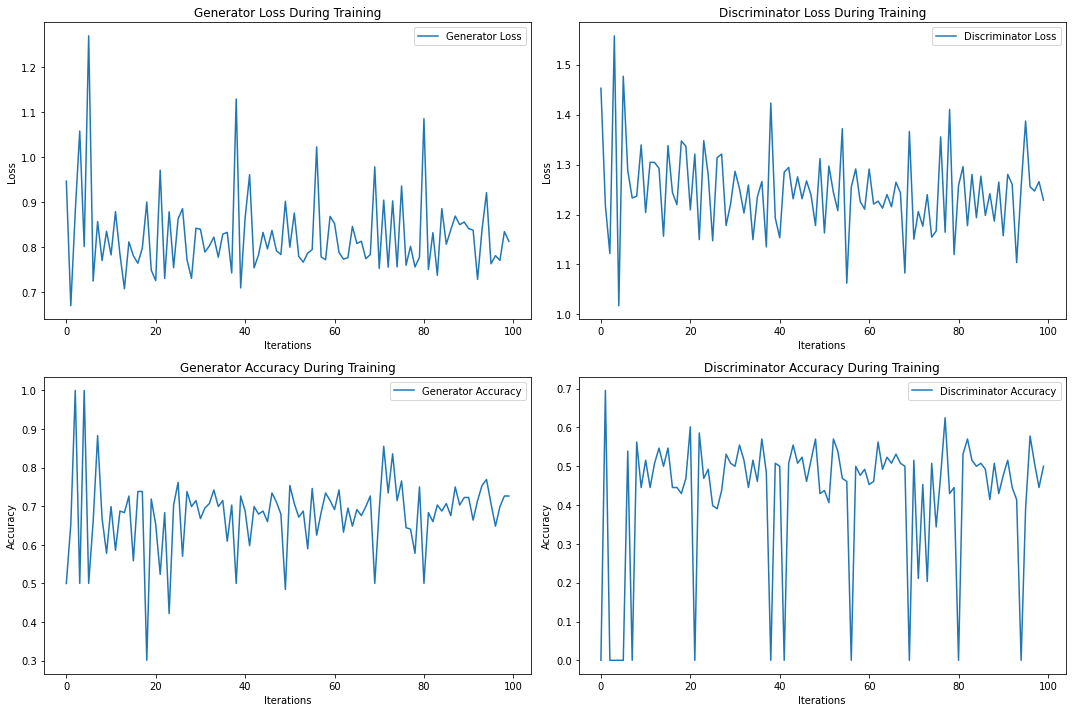

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot generator loss
axes[0, 0].plot(G_losses, label="Generator Loss")
axes[0, 0].set_xlabel("Iterations")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].set_title("Generator Loss During Training")
axes[0, 0].legend()

# Plot discriminator loss
axes[0, 1].plot(D_losses, label="Discriminator Loss")
axes[0, 1].set_xlabel("Iterations")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].set_title("Discriminator Loss During Training")
axes[0, 1].legend()

# Plot generator accuracy
axes[1, 0].plot(G_Accuracys, label="Generator Accuracy")
axes[1, 0].set_xlabel("Iterations")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].set_title("Generator Accuracy During Training")
axes[1, 0].legend()

# Plot discriminator accuracy
axes[1, 1].plot(D_Accuracys, label="Discriminator Accuracy")
axes[1, 1].set_xlabel("Iterations")
axes[1, 1].set_ylabel("Accuracy")
axes[1, 1].set_title("Discriminator Accuracy During Training")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [12]:
# generate new data point
noise = torch.randn(100, input_size)
condition = torch.randint(0, 2, (100,1))
generated_data = generator(noise, condition).detach().numpy()

generated_data = np.concatenate((generated_data[:, :17], condition.float().numpy(), generated_data[:, 17:]), axis=1)
generated_data = minmax.inverse_transform(generated_data)
generated_df = pd.DataFrame(generated_data, columns = feeds.columns) # convert to dataframe

In [13]:
columns_to_process = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'label', 'cillabel', 'pro', 'u_newsCatInterests_1',
       'u_newsCatInterests_2', 'u_newsCatInterests_3', 'u_newsCatInterests_4',
       'u_newsCatInterests_5', 'u_newsCatDislike_1', 'u_newsCatDislike_2',
       'u_newsCatDislike_3', 'u_newsCatDislike_4', 'u_newsCatDislike_5',
       'u_newsCatInterestsST_1', 'u_newsCatInterestsST_2',
       'u_newsCatInterestsST_3', 'u_newsCatInterestsST_4',
       'u_newsCatInterestsST_5', 'u_click_ca2_news_1', 'u_click_ca2_news_2',
       'u_click_ca2_news_3', 'u_click_ca2_news_4', 'u_click_ca2_news_5']

generated_df[columns_to_process] = generated_df[columns_to_process].applymap(lambda x: max(0, int(round(x))))
generated_df.head()

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,i_regionEntity,i_cat,i_dislikeTimes,i_upTimes,...,i_entities_4_encoded_2,i_entities_4_encoded_3,i_entities_4_encoded_4,i_entities_4_encoded_5,i_entities_5_encoded_1,i_entities_5_encoded_2,i_entities_5_encoded_3,i_entities_5_encoded_4,i_entities_5_encoded_5,minute_difference
0,220882,14,18,15,19,6,510,91,1,2,...,-15.812576,-21.768711,45.950920,-10.457383,-46.683201,1.368480,-5.978501,48.558952,-30.660736,8543.132812
1,208984,14,18,14,19,6,485,80,1,2,...,-16.516800,-23.330355,40.871681,-17.442116,-47.780453,-1.534734,-9.387401,44.214336,-31.893587,7686.627930
2,203069,14,17,14,18,5,466,80,1,2,...,-16.211912,-23.232885,39.149097,-19.700735,-48.798630,-2.867759,-10.656872,42.729542,-32.153687,7224.631836
3,205440,14,17,14,18,5,478,83,1,2,...,-14.815172,-22.248365,38.432796,-22.492445,-48.121330,-2.805773,-10.374856,43.505421,-33.144268,7125.903809
4,209974,14,18,14,19,6,459,79,1,2,...,-16.784737,-23.468016,41.527912,-16.889139,-49.294369,-1.601482,-9.112154,44.819199,-32.602715,7698.359375


In [14]:
i_docId_encoded_columns = ['i_docId_encoded_1', 'i_docId_encoded_2', 'i_docId_encoded_3', 'i_docId_encoded_4', 'i_docId_encoded_5']
i_docId = i_docId_encode_model.decoder(torch.tensor(generated_df[i_docId_encoded_columns].values)).detach().numpy()
i_docId = np.round(i_docId)
i_docId[i_docId > 35] = 35
i_docId[i_docId < 0] = 0
generated_df['i_docId'] = np.apply_along_axis(''.join, axis=1, arr=pd.DataFrame(np.apply_along_axis(vector_to_string, axis=1, arr=i_docId)))

In [17]:
i_s_sourceId_encoded_columns = ['i_s_sourceId_encoded_1', 'i_s_sourceId_encoded_2', 'i_s_sourceId_encoded_3', 'i_s_sourceId_encoded_4', 'i_s_sourceId_encoded_5']
i_s_sourceId = i_s_sourceId_encode_model.decoder(torch.tensor(generated_df[i_s_sourceId_encoded_columns].values)).detach().numpy()
i_s_sourceId = np.round(i_s_sourceId)
i_s_sourceId[i_s_sourceId > 35] = 35
i_s_sourceId[i_s_sourceId < 0] = 0
generated_df['i_s_sourceId'] = np.apply_along_axis(''.join, axis=1, arr=pd.DataFrame(np.apply_along_axis(vector_to_string, axis=1, arr=i_s_sourceId)))

In [18]:
def decode_and_process_columns(df, encoded_columns, model, output_column):
    
    encoded_values = df[encoded_columns].values
    
    encoded_tensor = torch.tensor(encoded_values, dtype=torch.float32)
    
    decoded_values = model.decoder(encoded_tensor).detach().numpy()
    
    decoded_values = np.round(decoded_values)
    decoded_values[decoded_values > 35] = 35
    decoded_values[decoded_values < 0] = 0
    
    df[output_column] = np.apply_along_axis(''.join, axis=1, arr=pd.DataFrame(np.apply_along_axis(vector_to_string, axis=1, arr=decoded_values)))

In [19]:
i_entities_1_encoded_columns = ['i_entities_1_encoded_'+str(i+1) for i in range(5)]
i_entities_2_encoded_columns = ['i_entities_2_encoded_'+str(i+1) for i in range(5)]
i_entities_3_encoded_columns = ['i_entities_3_encoded_'+str(i+1) for i in range(5)]
i_entities_4_encoded_columns = ['i_entities_4_encoded_'+str(i+1) for i in range(5)]
i_entities_5_encoded_columns = ['i_entities_5_encoded_'+str(i+1) for i in range(5)]
decode_and_process_columns(generated_df, i_entities_1_encoded_columns, i_entities_encode_model, 'i_entities_1')
decode_and_process_columns(generated_df, i_entities_2_encoded_columns, i_entities_encode_model, 'i_entities_2')
decode_and_process_columns(generated_df, i_entities_3_encoded_columns, i_entities_encode_model, 'i_entities_3')
decode_and_process_columns(generated_df, i_entities_4_encoded_columns, i_entities_encode_model, 'i_entities_4')
decode_and_process_columns(generated_df, i_entities_5_encoded_columns, i_entities_encode_model, 'i_entities_5')

In [20]:
reference_time = pd.to_datetime('2022-06-03 00:11')
generated_df['e_et'] = reference_time + pd.to_timedelta(generated_df['minute_difference'].astype(int), unit='m')

In [21]:
generated_df['e_et'].dt.strftime('%Y%m%d%H%M')

0     202206082234
1     202206080817
2     202206080035
3     202206072256
4     202206080829
          ...     
95    202206071733
96    202206072357
97    202206072046
98    202206071346
99    202206072057
Name: e_et, Length: 100, dtype: object

In [23]:
generated_df['i_entities'] = generated_df[['i_entities_'+str(i+1) for i in range(5)]].astype(str).agg('^'.join, axis=1)
generated_df['u_newsCatInterests'] = generated_df[['u_newsCatInterests_'+str(i+1) for i in range(5)]].astype(str).agg('^'.join, axis=1)
generated_df['u_newsCatDislike'] = generated_df[['u_newsCatDislike_'+str(i+1) for i in range(5)]].astype(str).agg('^'.join, axis=1)
generated_df['u_newsCatInterestsST'] = generated_df[['u_newsCatInterestsST_'+str(i+1) for i in range(5)]].astype(str).agg('^'.join, axis=1)
generated_df['u_click_ca2_news'] = generated_df[['u_click_ca2_news_'+str(i+1) for i in range(5)]].astype(str).agg('^'.join, axis=1)

In [24]:
get_columns = pd.read_csv('train/train_data_feeds.csv', nrows = 1)
generated_df[get_columns.columns]

,u_userId,u_phonePrice,u_browserLifeCycle,u_browserMode,u_feedLifeCycle,u_refreshTimes,u_newsCatInterests,u_newsCatDislike,u_newsCatInterestsST,u_click_ca2_news,...,e_ch,e_m,e_po,e_pl,e_rn,e_section,e_et,label,cillabel,pro
0,220882,14,18,15,19,6,175^153^117^79^203,41^43^0^79^0,156^124^77^178^162,174^166^115^140^144,...,18,456,9,2042,0,0,2022-06-08 22:34:00,1,0,18
1,208984,14,18,14,19,6,156^133^111^77^180,31^36^0^68^0,145^113^67^161^146,162^145^105^124^129,...,17,477,8,1777,0,0,2022-06-08 08:17:00,1,0,16
2,203069,14,17,14,18,5,148^126^109^74^170,29^35^0^63^0,141^111^67^151^137,157^139^100^120^124,...,16,482,7,1677,0,0,2022-06-08 00:35:00,0,0,15
3,205440,14,17,14,18,5,144^123^106^80^164,23^33^0^56^0,135^110^64^149^136,152^137^103^116^127,...,16,523,7,1601,0,0,2022-06-07 22:56:00,1,0,15
4,209974,14,18,14,19,6,160^135^112^74^180,35^39^0^70^0,146^113^67^161^148,162^147^103^125^130,...,17,452,8,1796,0,0,2022-06-08 08:29:00,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,197882,14,17,14,18,5,142^115^103^80^154,19^29^0^54^0,130^104^62^144^128,148^129^101^109^121,...,16,495,7,1539,0,0,2022-06-07 17:33:00,0,0,15
96,205810,14,17,14,18,5,148^125^108^75^168,28^35^0^59^0,139^110^66^150^136,152^139^101^119^125,...,16,469,8,1656,0,0,2022-06-07 23:57:00,0,0,15
97,202010,14,17,14,18,5,140^119^105^74^160,22^35^0^58^0,135^109^63^142^130,150^133^98^117^121,...,17,526,7,1616,0,0,2022-06-07 20:46:00,0,0,12
98,196735,13,17,14,17,5,135^112^101^80^147,16^29^0^49^0,127^104^64^137^126,143^125^97^112^120,...,16,529,7,1481,0,0,2022-06-07 13:46:00,0,0,14


Now we have finished the generation task.